# Ch26 - Classification

In [1]:
bInput = spark.read.format("parquet")\
    .load("../pyspark-training/data/The-Definitive-Guide/binary-classification")\
    .selectExpr("features", "cast(label as double) as label")

In [2]:
bInput.show(5)

+--------------+-----+
|      features|label|
+--------------+-----+
|[3.0,10.1,3.0]|  1.0|
|[1.0,0.1,-1.0]|  0.0|
|[1.0,0.1,-1.0]|  0.0|
| [2.0,1.1,1.0]|  1.0|
| [2.0,1.1,1.0]|  1.0|
+--------------+-----+



## Models
- Create a model and initiate hyperparameters as neccessary
- Train the model with `fit()`
- Make prediction with `transform()`
- Evaluate prediction with evaluators or summary

In [3]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier,\
                                      RandomForestClassifier, GBTClassifier, NaiveBayes

In [4]:
lr = LogisticRegression()
print(lr.explainParams())
lrModel = lr.fit(bInput)

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)
family: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
lowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)
lowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must beequal wi

In [5]:
print(lrModel.coefficients)
print(lrModel.intercept)

[6.848741326855034,0.35356589010197487,14.814900276915889]
-10.225695864480993


### Summary

In [6]:
summary = lrModel.summary
print(summary.areaUnderROC)
summary.roc.show() # FPR = False Positive Rate; TPR = True Positive Rate
summary.pr.show()

1.0
+---+------------------+
|FPR|               TPR|
+---+------------------+
|0.0|               0.0|
|0.0|0.3333333333333333|
|0.0|               1.0|
|1.0|               1.0|
|1.0|               1.0|
+---+------------------+

+------------------+---------+
|            recall|precision|
+------------------+---------+
|               0.0|      1.0|
|0.3333333333333333|      1.0|
|               1.0|      1.0|
|               1.0|      0.6|
+------------------+---------+



### Summary Chart

In [7]:
import matplotlib.pyplot as plt

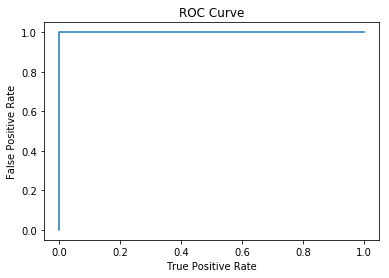

In [8]:
roc = summary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

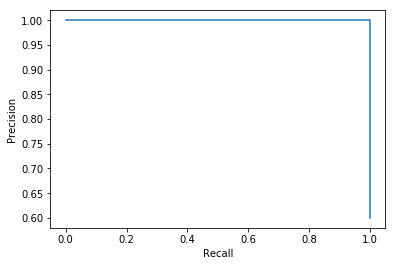

In [9]:
pr = summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [10]:
summary.objectiveHistory

[0.6730116670092565,
 0.5042829330409728,
 0.36356862066874396,
 0.1252407018038338,
 0.08532556611276212,
 0.03550487641573043,
 0.01819649450857124,
 0.008817369922959128,
 0.004413673785392138,
 0.002194038351234706,
 0.001096564114808084,
 0.0005476575519853136,
 0.000273762379514901,
 0.0001368465223657475,
 6.84180903707058e-05,
 3.4207077910384856e-05,
 1.710317666423191e-05,
 8.551470106426885e-06,
 4.275703677941412e-06,
 2.1378240117781396e-06,
 1.0688564054651744e-06,
 5.342600202575258e-07,
 2.668135105897087e-07,
 1.32046278653136e-07,
 6.768401481681801e-08,
 3.3145477184834547e-08,
 1.6151438837488498e-08,
 8.309350118268437e-09]

## Detailed Evaluation Metrics

In [11]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics

In [12]:
# out = model.transform(bInput)\
#     .select("prediction", "label")\
#     .rdd.map(lambda x: (float(x[0]), float(x[1])))
# metrics = BinaryClassificationMetrics(out)

# Ch27 - Regression

In [13]:
df = spark.read.load("../pyspark-training/data/The-Definitive-Guide/regression")

## Models

In [14]:
from pyspark.ml.regression import LinearRegression, GeneralizedLinearRegression,\
                                  DecisionTreeRegressor, RandomForestRegressor, GBTRegressor

In [15]:
lr = LinearRegression().setMaxIter(10).setRegParam(0.3).setElasticNetParam(0.8)
print(lr.explainParams())
lrModel = lr.fit(df)

aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)
elasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0, current: 0.8)
epsilon: The shape parameter to control the amount of robustness. Must be > 1.0. Only valid when loss is huber (default: 1.35)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
loss: The loss function to be optimized. Supported options: squaredError, huber. (default: squaredError)
maxIter: max number of iterations (>= 0). (default: 100, current: 10)
predictionCol: prediction column name. (default: prediction)
regParam: regularization parameter (>= 0). (default: 0.0, current: 0.3)
solver: The solver algorithm for optimization. Supported options: auto, normal, l-bfgs. (default: auto)
standardization: whether to standardize the tr

In [16]:
glr = GeneralizedLinearRegression()\
    .setFamily("gaussian")\
    .setLink("identity")\
    .setMaxIter(10)\
    .setRegParam(0.3)\
    .setLinkPredictionCol("linkOut")
print(glr.explainParams())
glrModel = glr.fit(df)

family: The name of family which is a description of the error distribution to be used in the model. Supported options: gaussian (default), binomial, poisson, gamma and tweedie. (default: gaussian, current: gaussian)
featuresCol: features column name. (default: features)
fitIntercept: whether to fit an intercept term. (default: True)
labelCol: label column name. (default: label)
link: The name of link function which provides the relationship between the linear predictor and the mean of the distribution function. Supported options: identity, log, inverse, logit, probit, cloglog and sqrt. (current: identity)
linkPower: The index in the power link function. Only applicable to the Tweedie family. (undefined)
linkPredictionCol: link prediction (linear predictor) column name (current: linkOut)
maxIter: max number of iterations (>= 0). (default: 25, current: 10)
offsetCol: The offset column name. If this is not set or empty, we treat all instance offsets as 0.0 (undefined)
predictionCol: pred

### Training Summary

In [17]:
# Linear Regression
summary = lrModel.summary
summary.residuals.show()
print(summary.totalIterations)
print(summary.objectiveHistory)
print(summary.rootMeanSquaredError)
print(summary.r2)

+--------------------+
|           residuals|
+--------------------+
| 0.12805046585610147|
| -0.1446826926157201|
|-0.41903832622420606|
|-0.41903832622420606|
|  0.8547088792080306|
+--------------------+

6
[0.5000000000000001, 0.43152958103627864, 0.313233593388102, 0.312256926665541, 0.30915060819830303, 0.30915058933480266]
0.47308424392175985
0.720239122691221


## Evaluators and Automating Model Tuning

**Structure of Grid Search with Train/Validation Setting**

- `CrossValidator()` & `TrainTestSplit()`
    - `setEstimator()` 
        - `Pipeline().setStages()`: Pipeline with enclosed stages of transformer and estimator
    - `setEstimatorParamMaps()` 
        - `ParamGridBuilder().addGrid().build()`
    - `setEvaluator()` 
        - `RegressionEvaluator().setMetricName().setPredictionCol().setLabelCol()`


- `CrossValidator()` Only
    - `setNumFolds()`


- `TrainTestSplit()` Only
    - `setTrainRatio()`

In [18]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [19]:
# Create Estimator object(s)
glr = GeneralizedLinearRegression().setFamily("gaussian").setLink("identity")
# Pass on Estimator (and Transformer if any) object(s) to create Pipeline object
pipeline = Pipeline().setStages([glr])

# Create Parameter object
params = ParamGridBuilder().addGrid(glr.regParam, [0, 0.5, 1]).build()
# Create Evaluator object
evaluator = RegressionEvaluator().setMetricName("rmse").setPredictionCol("prediction").setLabelCol("label")

# Pass On Pipeline, Evaluator, and Parameter objects to create CrossValidator object
cv = CrossValidator().setEstimator(pipeline).setEvaluator(evaluator).setEstimatorParamMaps(params)\
    .setNumFolds(2) # Should always be 3 or more but this dataset is small

# When using train - test split
tvs = TrainValidationSplit()\
    .setTrainRatio(0.75)\
    .setEstimatorParamMaps(params)\
    .setEstimator(pipeline)\
    .setEvaluator(evaluator)

model = cv.fit(df)

## Metrics

In [20]:
from pyspark.mllib.evaluation import RegressionMetrics

In [21]:
out = model.transform(df).select("prediction", "label")\
    .rdd.map(lambda x: (float(x[0]), float(x[1])))
metrics = RegressionMetrics(out)
print("MSE:", str(metrics.meanSquaredError))
print("RMSE:", str(metrics.rootMeanSquaredError))
print("R-squared:", str(metrics.r2))
print("MAE:", str(metrics.meanAbsoluteError))
print("Explained variance:", str(metrics.explainedVariance))

MSE: 0.21432448963739983
RMSE: 0.4629519301584127
R-squared: 0.7320943879532502
MAE: 0.34692281471051273
Explained variance: 0.32923447021104896


# Ch28 - Recommendation

## Model

In [22]:
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row

In [23]:
ratings = spark.read.text("../pyspark-training/data/The-Definitive-Guide/sample_movielens_ratings.txt")\
    .rdd.toDF()\
    .selectExpr("split(value, '::') as col")\
    .selectExpr(
        "cast(col[0] as int) as userId",
        "cast(col[1] as int) as movieId",
        "cast(col[2] as float) as rating",
        "cast(col[3] as long) as timestamp"
    )
training, test = ratings.randomSplit([0.8, 0.2])
als = ALS().setMaxIter(5).setRegParam(0.01).setUserCol("userId").setItemCol("movieId").setRatingCol("rating")
print(als.explainParams)
alsModel = als.fit(training)
predictions = alsModel.transform(test)

<bound method Params.explainParams of ALS_dfd75a9cd8c9>


In [24]:
alsModel.recommendForAllUsers(10).selectExpr("userId", "explode(recommendations)").show()
alsModel.recommendForAllItems(10).selectExpr("movieId", "explode(recommendations)").show()

+------+---------------+
|userId|            col|
+------+---------------+
|    28|[92, 5.0621486]|
|    28|[81, 4.8624105]|
|    28|[12, 4.6510425]|
|    28| [89, 4.108014]|
|    28|[49, 4.0182137]|
|    28|[82, 3.7844157]|
|    28|  [41, 3.30325]|
|    28|[76, 3.2404213]|
|    28|[46, 3.2176628]|
|    28|[62, 3.1551807]|
|    26|[11, 6.7013187]|
|    26| [34, 6.008671]|
|    26|[28, 5.7876697]|
|    26| [38, 5.566817]|
|    26|[39, 5.5340753]|
|    26|[47, 5.5142612]|
|    26| [83, 5.421278]|
|    26| [88, 5.370325]|
|    26| [94, 5.078953]|
|    26|   [7, 5.01875]|
+------+---------------+
only showing top 20 rows

+-------+---------------+
|movieId|            col|
+-------+---------------+
|     31|[21, 3.9870138]|
|     31| [25, 3.833418]|
|     31| [12, 3.769397]|
|     31| [6, 3.0408583]|
|     31| [8, 2.9987729]|
|     31| [7, 2.9306672]|
|     31|[23, 2.6415813]|
|     31| [10, 2.518232]|
|     31| [2, 2.5009112]|
|     31|[15, 2.2827435]|
|     85| [16, 4.940471]|
|     85| 

## Evaluation for Recommendation

In [25]:
evaluator = RegressionEvaluator().setMetricName("rmse").setLabelCol("rating").setPredictionCol("prediction")
rmse = evaluator.evaluate(predictions)
print("Root-mean-square error = {}".format(rmse))

Root-mean-square error = 1.6401660064853094


## Metrics
### Regression Metrics -  Same Case as Regression

In [26]:
# regComparison = predictions.select("rating", "prediction")\
#     .rdd.map(lambda x: (x(0), x(1)))
# metrics = RegressionMetrics(regComparison)
# print("RMSE:", str(metrics.rootMeanSquaredError))

### Ranking Metrics

In [27]:
from pyspark.mllib.evaluation import RankingMetrics
from pyspark.sql.functions import col, expr

In [28]:
# perUserActual = predictions.where("rating > 2.5").groupBy("userId").agg(expr("collect_set(movieId) as movies"))
# perUserPredictions = predictions.orderBy(col("userId"), expr("prediction DESC"))\
#     .groupBy("userId").agg(expr("collect_list(movieId) as movies"))
# perUserActualvPred = perUserActual.join(perUserPredictions, ["userId"]).rdd\
#     .map(lambda row: (row[1], row[2][:15]))
# ranks = RankingMetrics(perUserActualvPred)
# ranks.meanAveragePrecision
# ranks.precisionAt(5)

# Ch29 - Unsupervised Learning

In [29]:
from pyspark.ml.feature import VectorAssembler

In [31]:
va = VectorAssembler().setInputCols(["Quantity", "UnitPrice"]).setOutputCol("features")
sales = va.transform(spark.read.format("csv")
                     .option("header", "true")
                     .option("inferSchema", "true")
                     .load("../pyspark-training/data/The-Definitive-Guide/retail-data/by-day/*.csv")
                     .limit(50)
                     .coalesce(1)
                     .where("Description IS NOT NULL"))
sales.cache()

DataFrame[InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string, features: vector]

## Clustering Models
- Create a model and initiate hyperparameters as neccessary
- Train clustering model with `fit()`
- Use `.summary` to access the results
- `transform()` is not needed for clustering

In [32]:
from pyspark.ml.clustering import KMeans, BisectingKMeans, GaussianMixture

In [33]:
km = KMeans().setK(5)
print(km.explainParams())
kmModel = km.fit(sales)

distanceMeasure: the distance measure. Supported options: 'euclidean' and 'cosine'. (default: euclidean)
featuresCol: features column name. (default: features)
initMode: The initialization algorithm. This can be either "random" to choose random points as initial cluster centers, or "k-means||" to use a parallel variant of k-means++ (default: k-means||)
initSteps: The number of steps for k-means|| initialization mode. Must be > 0. (default: 2)
k: The number of clusters to create. Must be > 1. (default: 2, current: 5)
maxIter: max number of iterations (>= 0). (default: 20)
predictionCol: prediction column name. (default: prediction)
seed: random seed. (default: 7969353092125344463)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 0.0001)


In [34]:
bkm = BisectingKMeans().setK(5).setMaxIter(5)
bkmModel = bkm.fit(sales)

In [35]:
gmm = GaussianMixture().setK(5)
print(gmm.explainParams())
model = gmm.fit(sales)

featuresCol: features column name. (default: features)
k: Number of independent Gaussians in the mixture model. Must be > 1. (default: 2, current: 5)
maxIter: max number of iterations (>= 0). (default: 100)
predictionCol: prediction column name. (default: prediction)
probabilityCol: Column name for predicted class conditional probabilities. Note: Not all models output well-calibrated probability estimates! These probabilities should be treated as confidences, not precise probabilities. (default: probability)
seed: random seed. (default: -7090211980209472397)
tol: the convergence tolerance for iterative algorithms (>= 0). (default: 0.01)


## Summary

In [51]:
summary = kmModel.summary
print(summary.clusterSizes)
kmModel.computeCost(sales)
kmCenters = kmModel.clusterCenters()
print("Cluster Centers:")
for center in kmCenters:
    print(center)

[29, 15, 1, 1, 4]
Cluster Centers:
[4.89655172 4.72137931]
[25.06666667  1.78866667]
[80.    2.55]
[48.    0.85]
[13.5    2.825]


In [52]:
summary = bkmModel.summary
print(summary.clusterSizes)
bkmModel.computeCost(sales)
bkmCenters = bkmModel.clusterCenters()
print("Cluster Centers:")
for center in bkmCenters:
    print(center)

[12, 17, 3, 16, 2]
Cluster Centers:
[3.         7.42916667]
[6.23529412 2.81      ]
[12.          2.78333333]
[24.625    1.86125]
[64.   1.7]


In [42]:
import pandas as pd

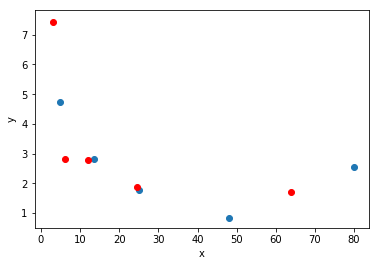

In [53]:
kmCentersDF = pd.DataFrame(kmCenters)
bkmCentersDF = pd.DataFrame(bkmCenters)
plt.scatter(kmCentersDF[0], kmCentersDF[1])
plt.scatter(bkmCentersDF[0], bkmCentersDF[1], c ='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [38]:
summary = model.summary
print(model.weights)
model.gaussiansDF.show()
summary.cluster.show()
summary.clusterSizes
summary.probability.show()

[0.2399996030990126, 0.05999804365295938, 0.06000000144287213, 0.5349932359615557, 0.10500911584360029]
+--------------------+--------------------+
|                mean|                 cov|
+--------------------+--------------------+
|[23.9999999997347...|5.651154675086383...|
|[21.3333269377375...|67.55387092707048...|
|[54.6666659279453...|344.8889033071298...|
|[4.76092860596662...|2.855833868722962...|
|[10.7894157575791...|18.69223755455921...|
+--------------------+--------------------+

+----------+
|prediction|
+----------+
|         3|
|         3|
|         3|
|         3|
|         3|
|         3|
|         4|
|         3|
|         3|
|         1|
|         3|
|         3|
|         4|
|         3|
|         4|
|         3|
|         3|
|         3|
|         3|
|         3|
+----------+
only showing top 20 rows

+--------------------+
|         probability|
+--------------------+
|[1.51694832611081...|
|[1.48944049771939...|
|[1.06558046296148...|
|[1.48944049771939...|
